In [ ]:
'''
Perform standard imbalanced techniques for hepatitis data

Classifiers
- Log reg
- SVM
- Naive Bayes
- K-Nearest Neighbors
- Decision Trees

Techniques
- None
- Oversampling
- Undersampling
- SMOTE
- penalized SVM, (LDA)
- XGBoost
'''

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def getScores(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("-----" + name + " scores-----")
    print("Accuracy: " + str(model.score(X_test, y_test)))
    print("Precision: " + str(precision_score(y_test, y_pred)))
    print("Recall: " + str(recall_score(y_test, y_pred)))

    display = PrecisionRecallDisplay.from_estimator(
        model, X_test, y_test, name=name
    )
    _ = display.ax_.set_title(name + " Precision-Recall curve")
    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

    print("\n")

def testAllModels(X_train, y_train, X_test, y_test):

    lr = LogisticRegression(random_state=1)
    svm = SVC(random_state=1)
    gnb = GaussianNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()

    lr.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    gnb.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    dt.fit(X_train, y_train)

    getScores("Logistic Regression", lr, X_test, y_test)
    getScores("Support Vector Machine", svm, X_test, y_test)
    getScores("Gaussian Naive Bayes", gnb, X_test, y_test)
    getScores("K Nearest Neighbors", knn, X_test, y_test)
    getScores("Decision Trees", dt, X_test, y_test)

In [6]:
df = pd.read_csv('../data/hepatitis.csv')

In [7]:
# sc=StandardScaler()
# sc.fit(df.drop(["Class"], axis = 1))
# scaled_features = sc.transform(df.drop(["Class"], axis = 1))
# X = scaled_features
# y = df["Class"]

from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
scaled_features = mmscaler.fit_transform(df.drop(["Class"], axis = 1))
X = scaled_features
y = df["Class"]

-----Logistic Regression scores-----
Accuracy: 0.8709677419354839
Precision: 0.6666666666666666
Recall: 0.4


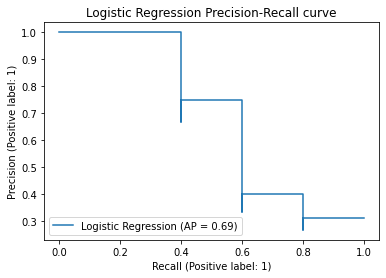

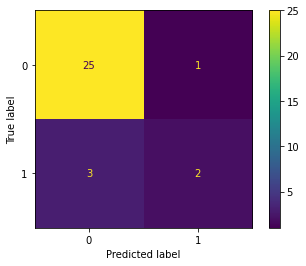



-----Support Vector Machine scores-----
Accuracy: 0.8709677419354839
Precision: 0.6666666666666666
Recall: 0.4


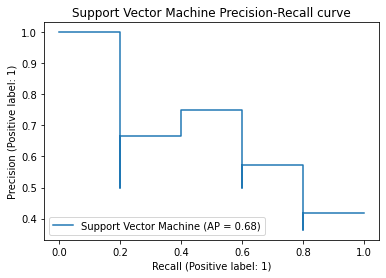

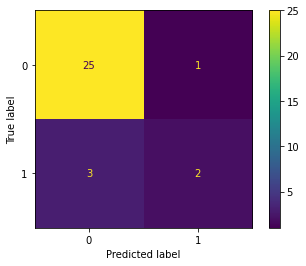



-----Gaussian Naive Bayes scores-----
Accuracy: 0.6774193548387096
Precision: 0.3333333333333333
Recall: 1.0


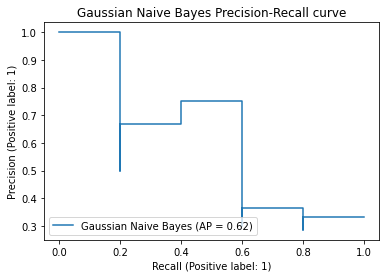

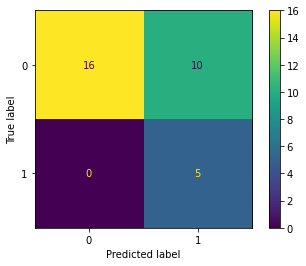



-----K Nearest Neighbors scores-----
Accuracy: 0.8709677419354839
Precision: 1.0
Recall: 0.2


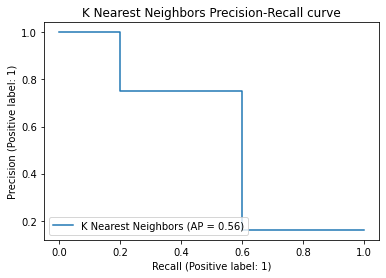

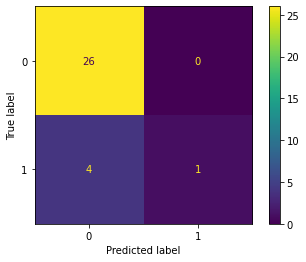



-----Decision Trees scores-----
Accuracy: 0.8064516129032258
Precision: 0.4
Recall: 0.4


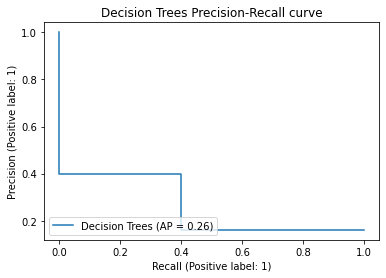

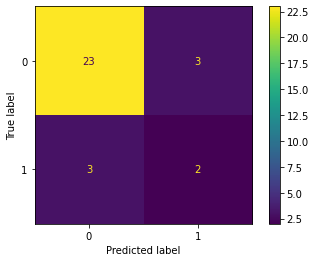

In [8]:
# None
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
testAllModels(X_train, y_train, X_test, y_test)

Ratio: 0.3
-----Logistic Regression scores-----
Accuracy: 0.8387096774193549
Precision: 0.5
Recall: 0.4


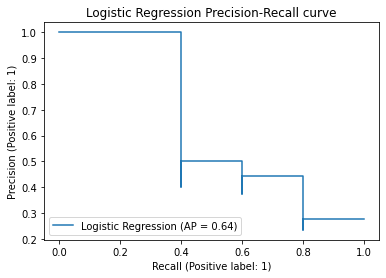

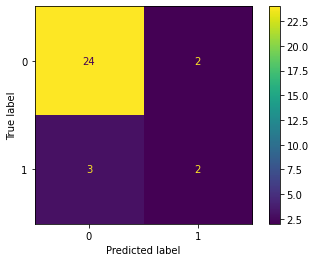



-----Support Vector Machine scores-----
Accuracy: 0.8709677419354839
Precision: 0.6666666666666666
Recall: 0.4


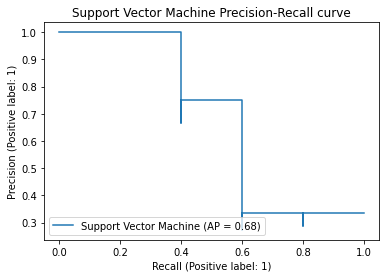

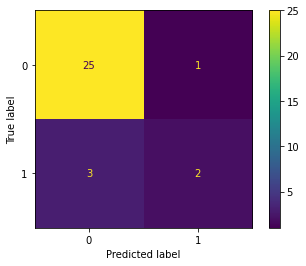



-----Gaussian Naive Bayes scores-----
Accuracy: 0.6774193548387096
Precision: 0.3333333333333333
Recall: 1.0


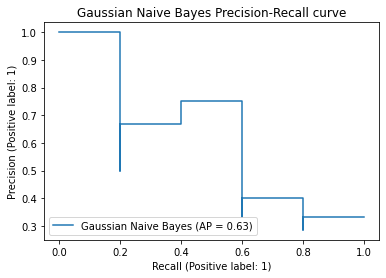

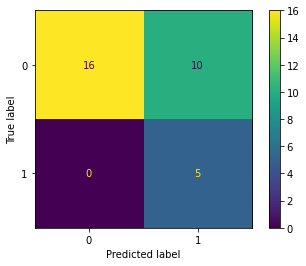



-----K Nearest Neighbors scores-----
Accuracy: 0.8387096774193549
Precision: 0.5
Recall: 0.2


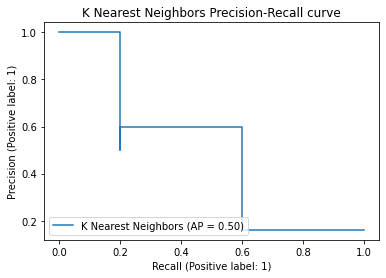

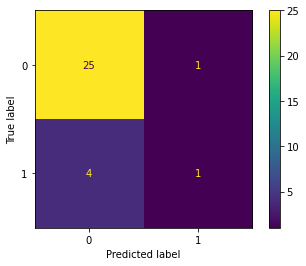



-----Decision Trees scores-----
Accuracy: 0.7741935483870968
Precision: 0.3333333333333333
Recall: 0.4


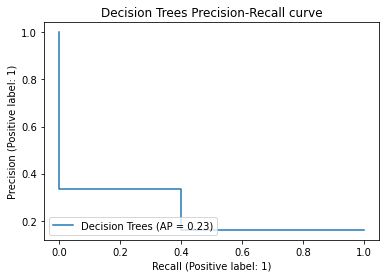

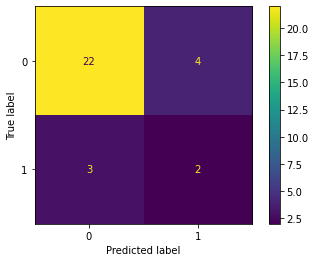





Ratio: 0.6
-----Logistic Regression scores-----
Accuracy: 0.8064516129032258
Precision: 0.4
Recall: 0.4


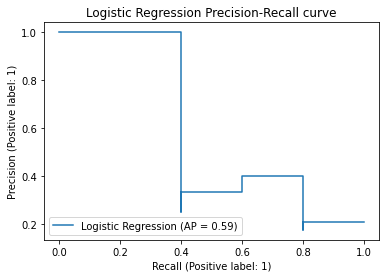

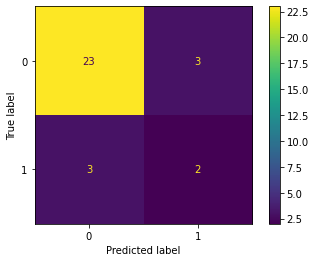



-----Support Vector Machine scores-----
Accuracy: 0.8709677419354839
Precision: 0.6666666666666666
Recall: 0.4


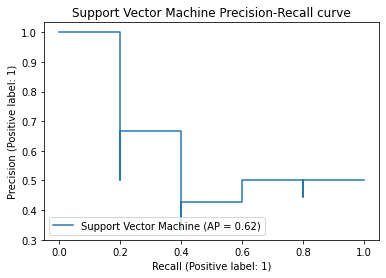

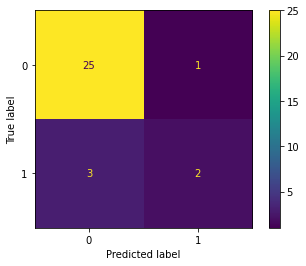



-----Gaussian Naive Bayes scores-----
Accuracy: 0.5806451612903226
Precision: 0.2777777777777778
Recall: 1.0


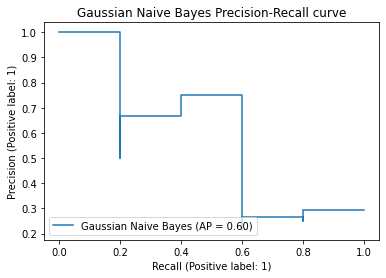

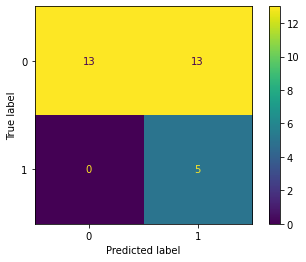



-----K Nearest Neighbors scores-----
Accuracy: 0.8387096774193549
Precision: 0.5
Recall: 0.4


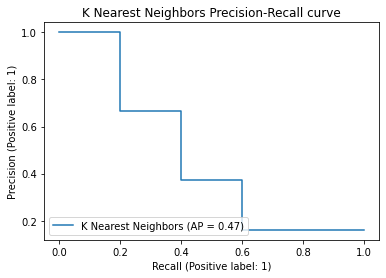

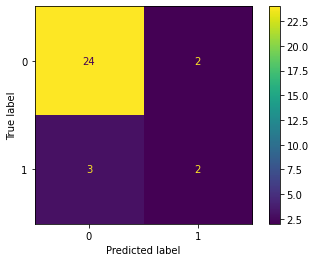



-----Decision Trees scores-----
Accuracy: 0.6774193548387096
Precision: 0.2727272727272727
Recall: 0.6


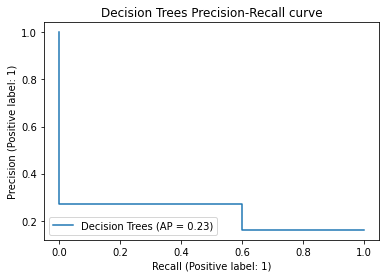

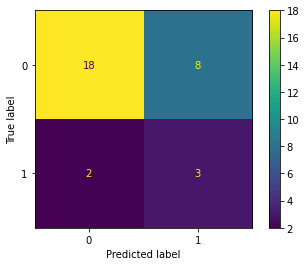





Ratio: 1.0
-----Logistic Regression scores-----
Accuracy: 0.8064516129032258
Precision: 0.4
Recall: 0.4


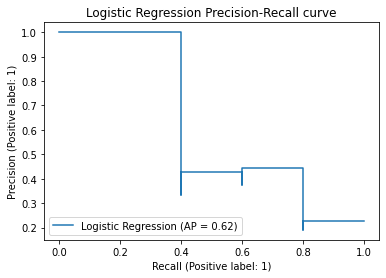

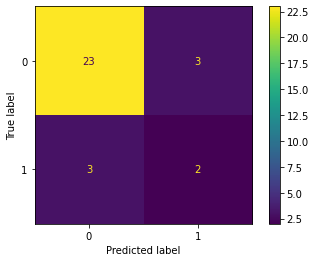



-----Support Vector Machine scores-----
Accuracy: 0.8387096774193549
Precision: 0.5
Recall: 0.4


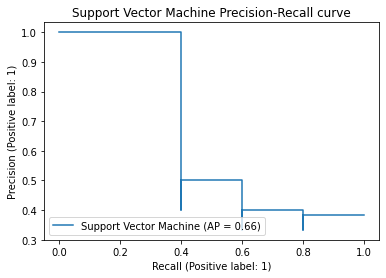

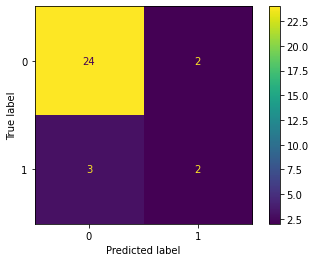



-----Gaussian Naive Bayes scores-----
Accuracy: 0.6451612903225806
Precision: 0.3125
Recall: 1.0


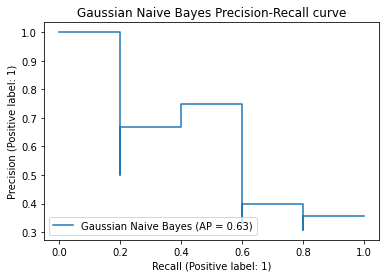

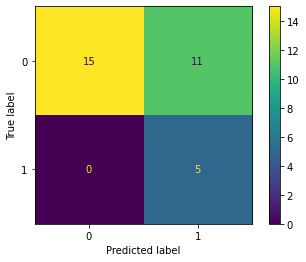



-----K Nearest Neighbors scores-----
Accuracy: 0.6451612903225806
Precision: 0.2
Recall: 0.4


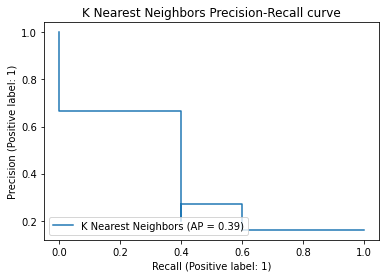

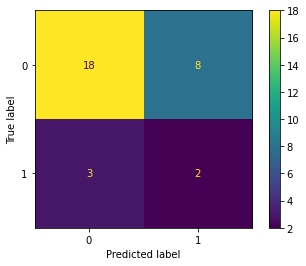



-----Decision Trees scores-----
Accuracy: 0.8064516129032258
Precision: 0.42857142857142855
Recall: 0.6


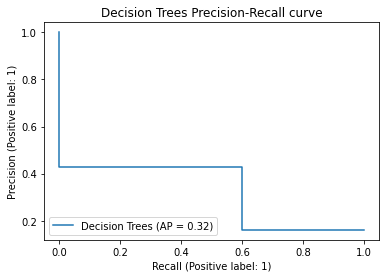

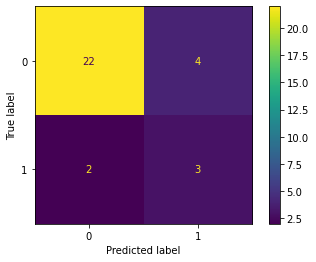

In [96]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler

print('Ratio: 0.3')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
ros = RandomOverSampler(random_state = 1, sampling_strategy = 0.3)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

print('Ratio: 0.6')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
ros = RandomOverSampler(random_state = 1, sampling_strategy = 0.6)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

print('Ratio: 1.0')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
ros = RandomOverSampler(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

Ratio: 0.3
-----Logistic Regression scores-----
Accuracy: 0.8709677419354839
Precision: 0.6666666666666666
Recall: 0.4


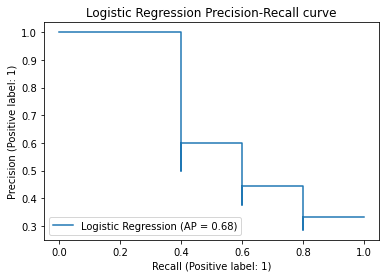

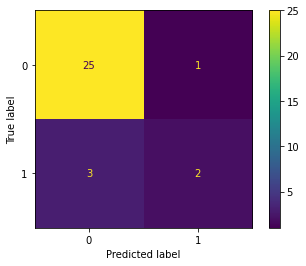



-----Support Vector Machine scores-----
Accuracy: 0.8709677419354839
Precision: 0.6666666666666666
Recall: 0.4


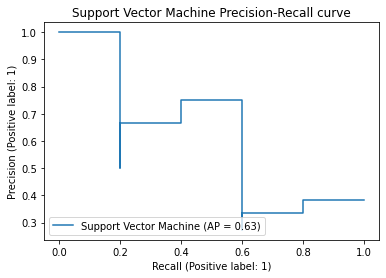

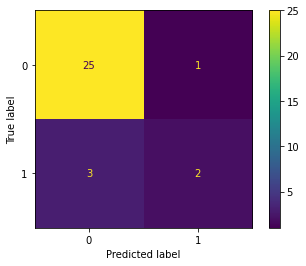



-----Gaussian Naive Bayes scores-----
Accuracy: 0.6774193548387096
Precision: 0.3333333333333333
Recall: 1.0


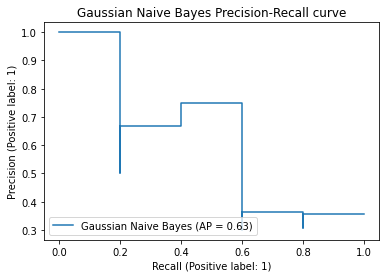

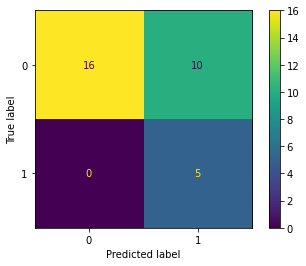



-----K Nearest Neighbors scores-----
Accuracy: 0.8387096774193549
Precision: 0.5
Recall: 0.2


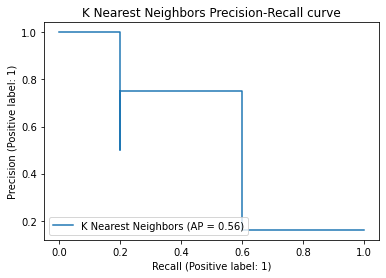

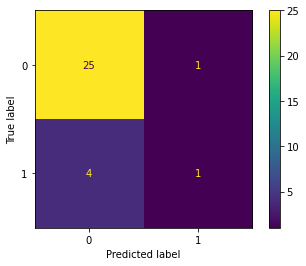



-----Decision Trees scores-----
Accuracy: 0.8064516129032258
Precision: 0.4
Recall: 0.4


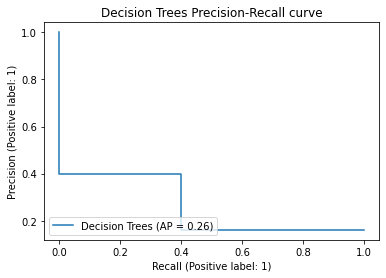

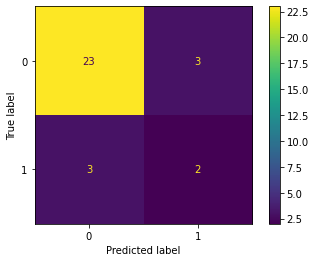





Ratio: 0.6
-----Logistic Regression scores-----
Accuracy: 0.8387096774193549
Precision: 0.5
Recall: 0.4


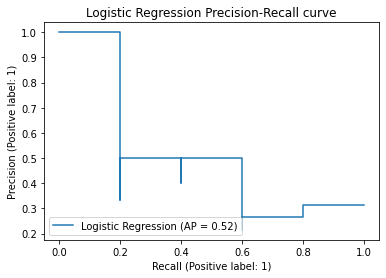

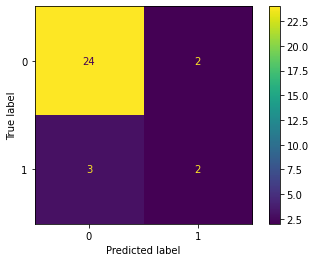



-----Support Vector Machine scores-----
Accuracy: 0.9032258064516129
Precision: 0.75
Recall: 0.6


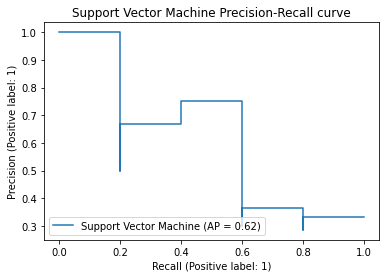

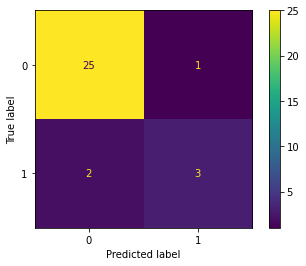



-----Gaussian Naive Bayes scores-----
Accuracy: 0.6774193548387096
Precision: 0.3333333333333333
Recall: 1.0


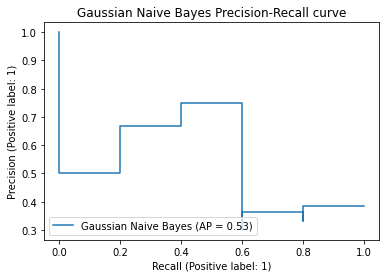

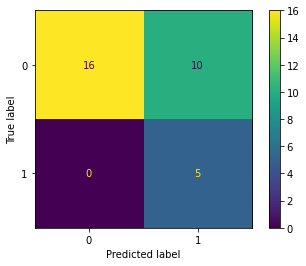



-----K Nearest Neighbors scores-----
Accuracy: 0.8387096774193549
Precision: 0.5
Recall: 0.2


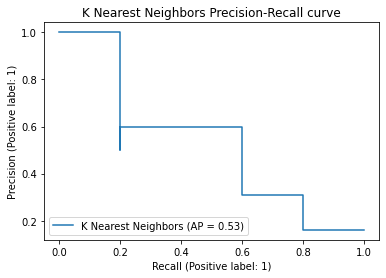

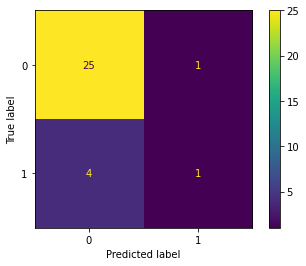



-----Decision Trees scores-----
Accuracy: 0.7096774193548387
Precision: 0.3
Recall: 0.6


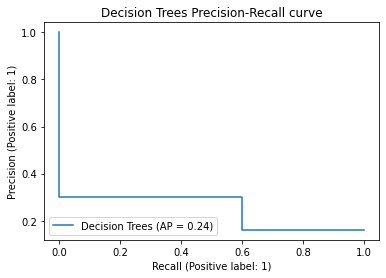

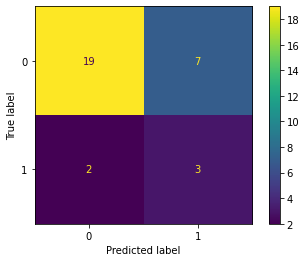





Ratio: 1.0
-----Logistic Regression scores-----
Accuracy: 0.7419354838709677
Precision: 0.2857142857142857
Recall: 0.4


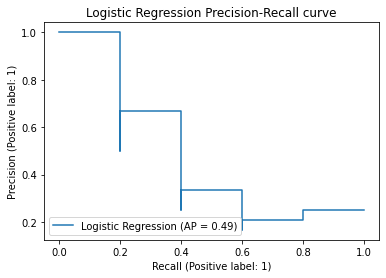

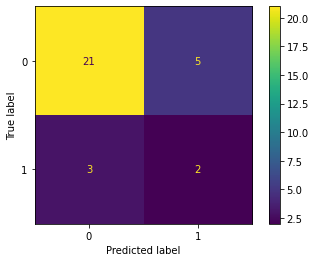



-----Support Vector Machine scores-----
Accuracy: 0.8387096774193549
Precision: 0.5
Recall: 0.6


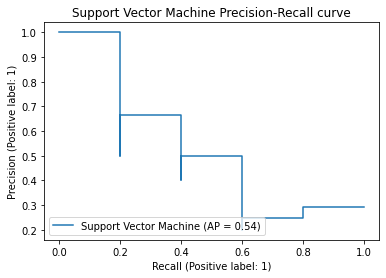

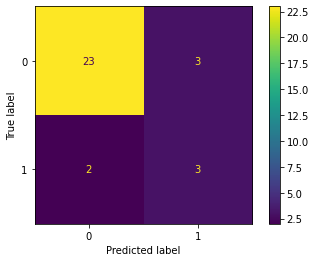



-----Gaussian Naive Bayes scores-----
Accuracy: 0.8387096774193549
Precision: 0.5
Recall: 0.6


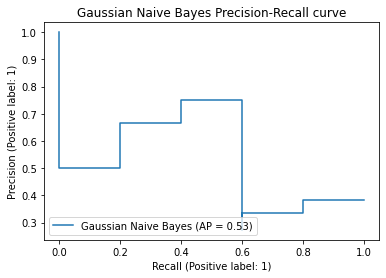

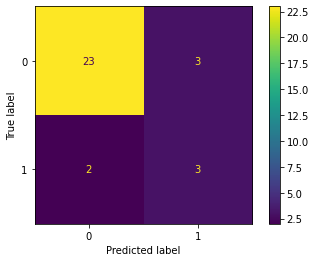



-----K Nearest Neighbors scores-----
Accuracy: 0.8387096774193549
Precision: 0.5
Recall: 0.4


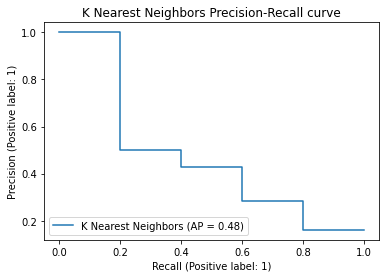

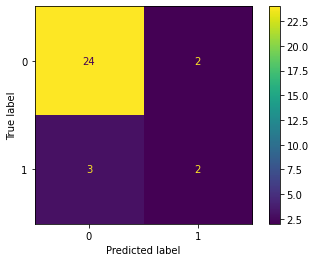



-----Decision Trees scores-----
Accuracy: 0.6451612903225806
Precision: 0.25
Recall: 0.6


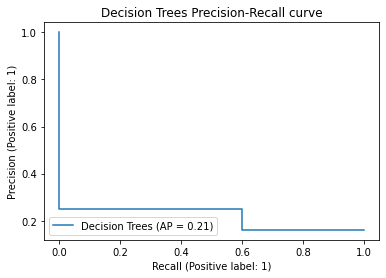

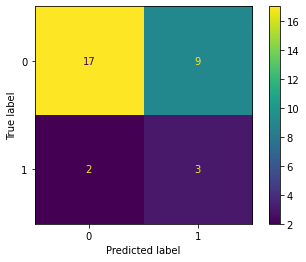

In [97]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler

print('Ratio: 0.3')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rus = RandomUnderSampler(random_state = 1, sampling_strategy = 0.3)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

print('Ratio: 0.6')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rus = RandomUnderSampler(random_state = 1, sampling_strategy = 0.6)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

print('Ratio: 1.0')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rus = RandomUnderSampler(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

Ratio: 0.3
-----Logistic Regression scores-----
Accuracy: 0.8387096774193549
Precision: 0.5
Recall: 0.4


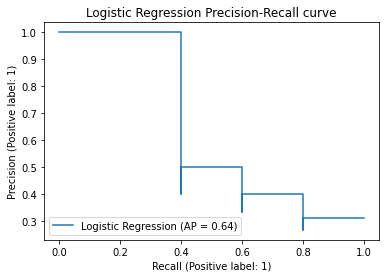

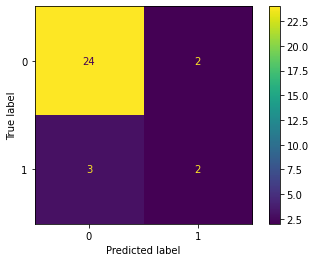



-----Support Vector Machine scores-----
Accuracy: 0.8709677419354839
Precision: 0.6666666666666666
Recall: 0.4


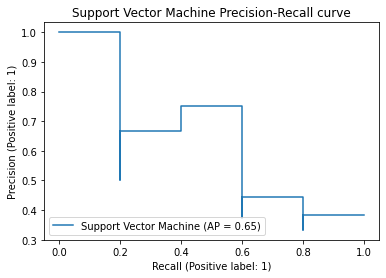

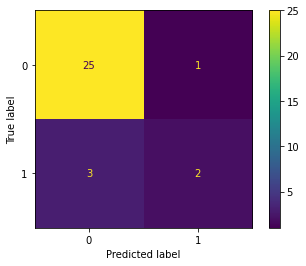



-----Gaussian Naive Bayes scores-----
Accuracy: 0.6129032258064516
Precision: 0.29411764705882354
Recall: 1.0


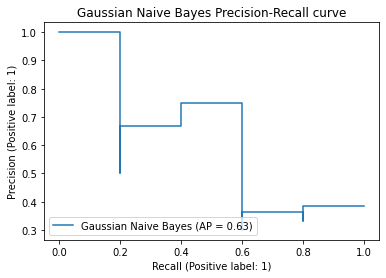

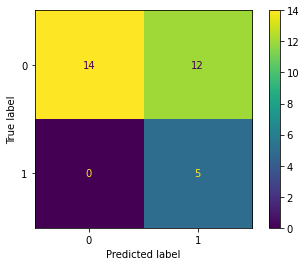



-----K Nearest Neighbors scores-----
Accuracy: 0.8387096774193549
Precision: 0.5
Recall: 0.2


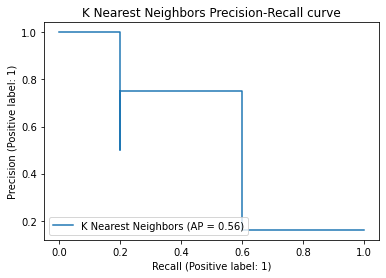

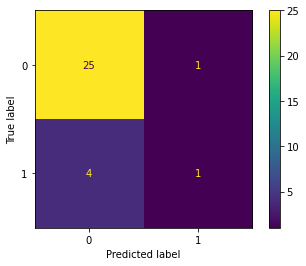



-----Decision Trees scores-----
Accuracy: 0.7096774193548387
Precision: 0.16666666666666666
Recall: 0.2


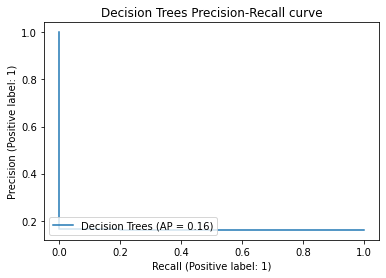

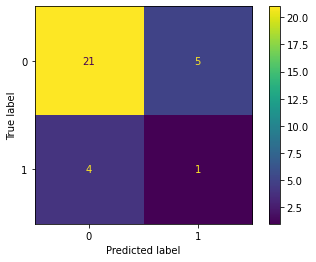





Ratio: 0.6
-----Logistic Regression scores-----
Accuracy: 0.8064516129032258
Precision: 0.4
Recall: 0.4


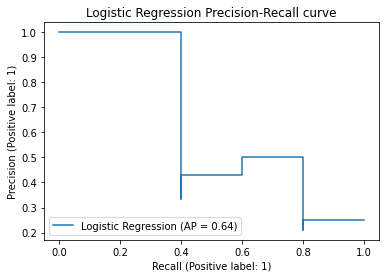

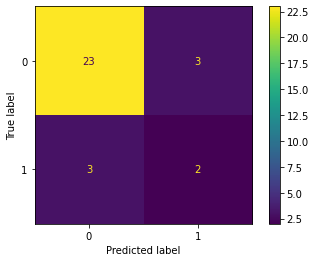



-----Support Vector Machine scores-----
Accuracy: 0.8709677419354839
Precision: 0.6666666666666666
Recall: 0.4


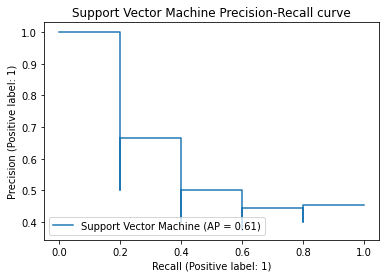

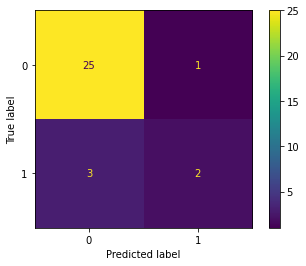



-----Gaussian Naive Bayes scores-----
Accuracy: 0.6129032258064516
Precision: 0.26666666666666666
Recall: 0.8


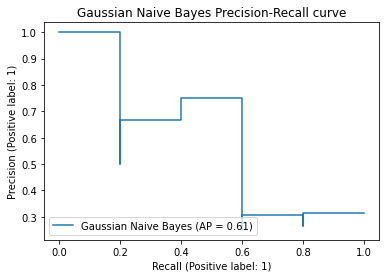

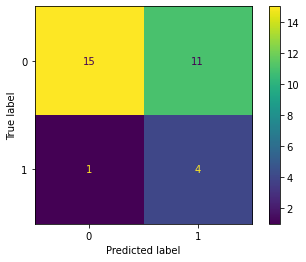



-----K Nearest Neighbors scores-----
Accuracy: 0.7741935483870968
Precision: 0.3333333333333333
Recall: 0.4


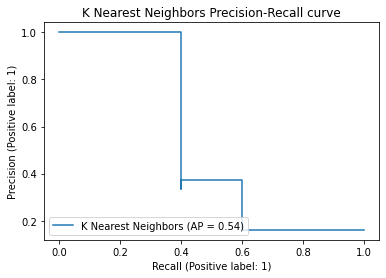

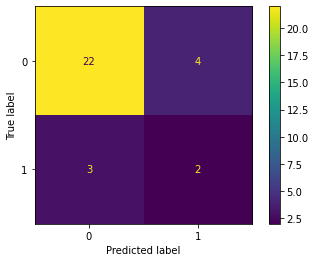



-----Decision Trees scores-----
Accuracy: 0.6774193548387096
Precision: 0.14285714285714285
Recall: 0.2


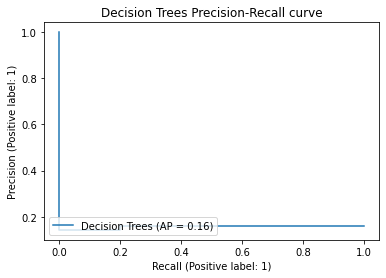

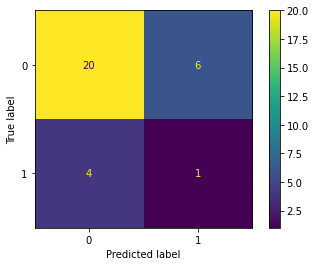





Ratio: 1.0
-----Logistic Regression scores-----
Accuracy: 0.8064516129032258
Precision: 0.4
Recall: 0.4


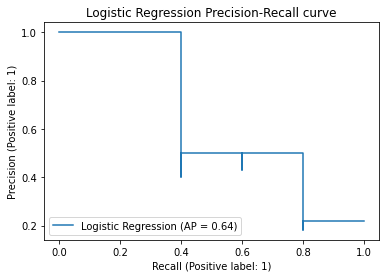

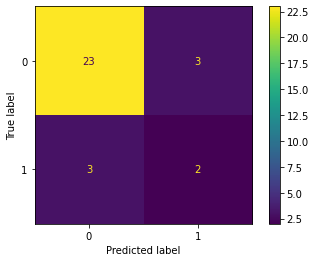



-----Support Vector Machine scores-----
Accuracy: 0.8387096774193549
Precision: 0.5
Recall: 0.4


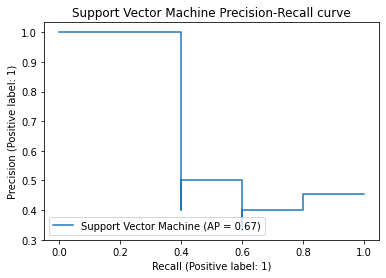

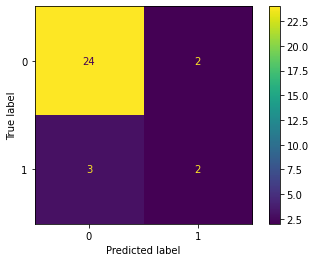



-----Gaussian Naive Bayes scores-----
Accuracy: 0.7096774193548387
Precision: 0.3333333333333333
Recall: 0.8


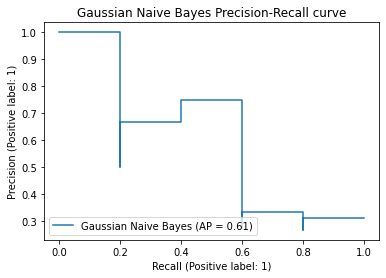

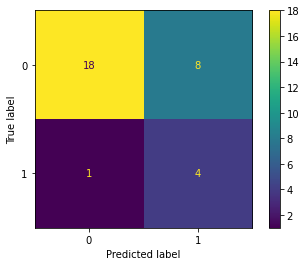



-----K Nearest Neighbors scores-----
Accuracy: 0.7419354838709677
Precision: 0.3333333333333333
Recall: 0.6


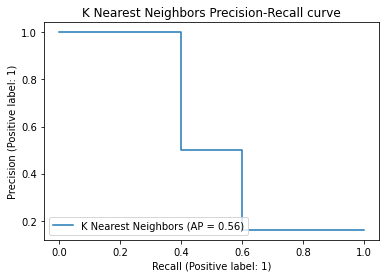

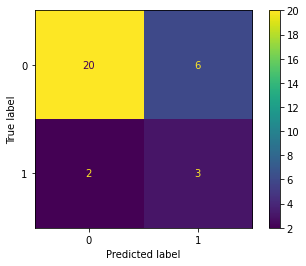



-----Decision Trees scores-----
Accuracy: 0.8709677419354839
Precision: 0.6
Recall: 0.6


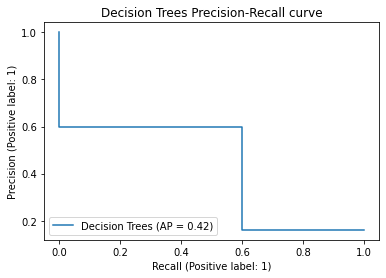

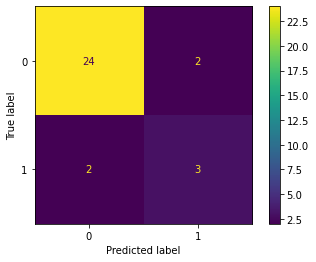

In [98]:
# SMOTE
from imblearn.over_sampling import SMOTE

print('Ratio: 0.3')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
smote = SMOTE(random_state = 1, sampling_strategy = 0.3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

print('Ratio: 0.6')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
smote = SMOTE(random_state = 1, sampling_strategy = 0.6)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

print('Ratio: 1.0')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

-----Support Vector Machine scores-----
Accuracy: 0.8064516129032258
Precision: 0.42857142857142855
Recall: 0.6


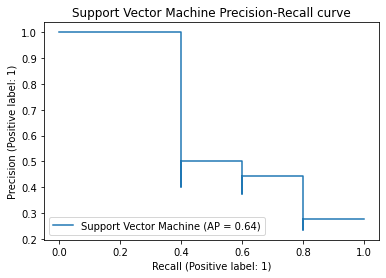

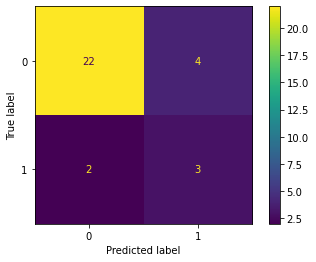

In [99]:
# Penalized SVM

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
svm = SVC(kernel="linear", class_weight={1: 10})
svm.fit(X_train, y_train)
getScores("Support Vector Machine", svm, X_test, y_test)